In [7]:
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('/home/lodya/Projects/Term_Project_1/caption_search/meta_csv.csv', delimiter='\t')
df = df.dropna(how='all')
df.head()

,id,title,duration,categories,tags,description,playlist,subtitles,automatic_captions
1,--VYlmbkzNY,Simple model to understand r and g relationship,465.0,['Education'],[],Description\nMore free lessons at: http://www....,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?signatur...
2,-05OfTp6ZEE,Deficit and debt ceiling | American civics | U...,597.0,['Education'],[],"Basic of the deficit, debt and debt ceiling. C...",NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?v=-05OfT...
3,-0qEDcZZS9E,Vector components from initial and terminal po...,380.0,['Education'],[],Practice this lesson yourself on KhanAcademy.o...,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?xorp=Tru...
4,-1zR6pFof5c,Khan Academy in Idaho,174.0,['Education'],[],A 3-minute video highlighting educator feedbac...,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?asr_lang...
5,-2HwisGonfc,Adding vectors exercise example | Vectors | Pr...,89.0,['Education'],[],Practice this lesson yourself on KhanAcademy.o...,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?hl=en&ca...


Всего на канале Khan Academy (https://www.youtube.com/user/khanacademy) на 25/05/2019 было загружено 7458 видео. Из них 7125 были снабжены субтитрами (не автоматическими) на английском языке в формате vtt (стандартный для канала формат). Автоматические субтитры имели 7398 видео. 31 видео не имели субтитров вообще.
Совокупная длина видеоматериала составила порядка 860 часов. Медианная длина ролика -- 6 минут 20 секунд.

In [3]:
df.shape

(7125, 9)

<IPython.core.display.Javascript object>


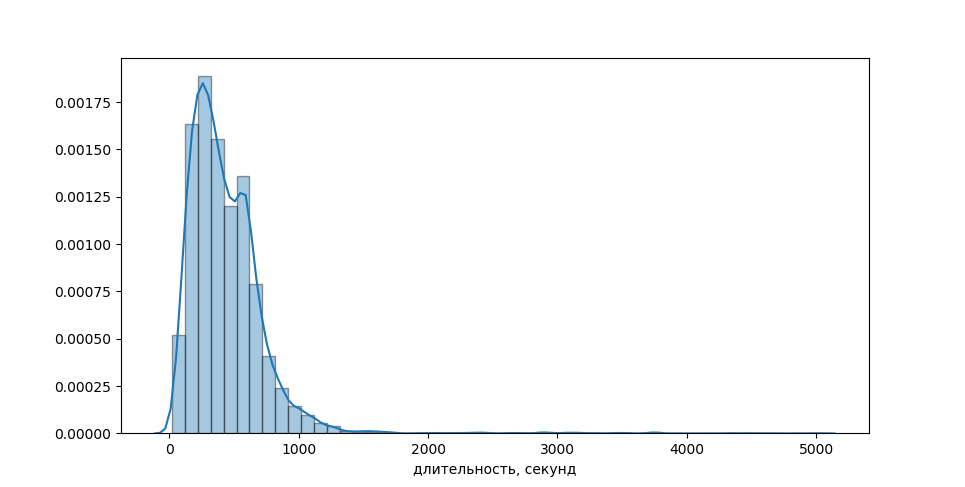

In [18]:
sns.distplot(df.dropna(how='all').duration,
             bins=50,
             hist_kws=dict(edgecolor="k", linewidth=1),
             axlabel='длительность, секунд')

In [19]:
print('Cummulative duration, hours:', '{:.1f}'.format(df.dropna(how='all').duration.sum() / 60 / 60))
print('Median length:', df.dropna(how='all').duration.median())
print('Mode length:', df.dropna(how='all').duration.mode()[0])

Cummulative duration, hours: 860.3
Median length: 379.0
Mode length: 240.0


При этом на одно видео приходится в среднем 159 строк субтитров. А средняя длительность одной строки составляет 2,6 секунд,8 слов и 42 символа.

In [20]:
df2 = pd.read_csv('/home/lodya/Projects/Term_Project_1/caption_search/subtitles.csv', delimiter='\t')
df2 = df2.dropna(how='any')
df2['number_of_symbols'] = df2.plain_text.str.len()
df2['number_of_words'] = df2.plain_text.str.split().apply(len)
df2.plain_text = df2.plain_text.str.replace('&lt;.*?&gt;', '')
df2.plain_text = df2.plain_text.str.replace('\\|/', '')
df2.head()

,id,number_of_lines,plain_text,number_of_symbols,number_of_words
0,--VYlmbkzNY,193,- [Instructor] What I wanna do in this video i...,7449,1431
1,-05OfTp6ZEE,223,"Before we talk about the debt ceiling, it's im...",9530,1779
2,-0qEDcZZS9E,76,We can never have too much practice getting fa...,4339,669
3,-1zR6pFof5c,65,(hip hop music) Kelly: I've never seen this. T...,2658,509
4,-2HwisGonfc,31,Voiceover:Vectors A and B are drawn in the int...,1326,275


<IPython.core.display.Javascript object>


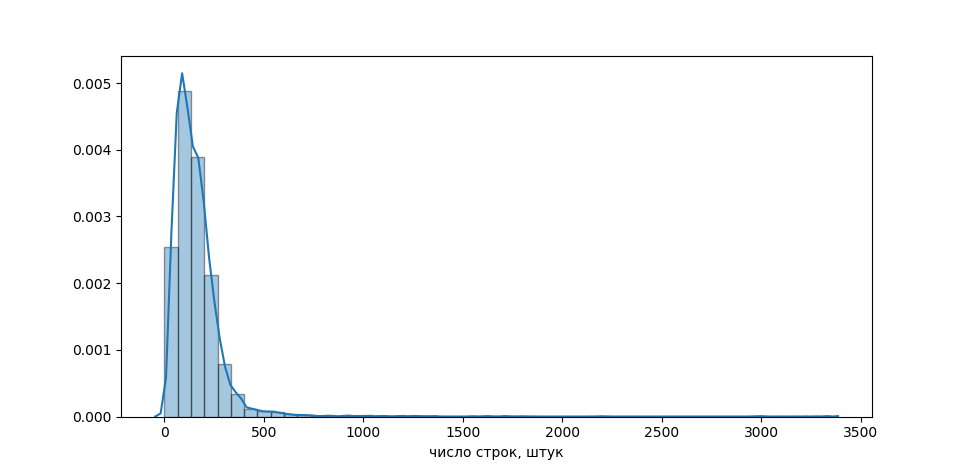

In [21]:
sns.distplot(df2.dropna(how='all').number_of_lines, bins=50, hist_kws=dict(edgecolor="k", linewidth=1), axlabel='число строк, штук')

In [22]:
print('Cummulative number_of_lines:', '{:.1f}'.format(df2.dropna(how='all').number_of_lines.sum()))
print('Median number_of_lines:', df2.dropna(how='all').number_of_lines.median())
print('Mean number_of_lines:', '{:.1f}'.format(df2.dropna(how='all').number_of_lines.mean()))
print('Mode number_of_lines:', df2.dropna(how='all').number_of_lines.mode()[0])

Cummulative number_of_lines: 1180734.0
Median number_of_lines: 136.0
Mean number_of_lines: 159.0
Mode number_of_lines: 97


In [23]:
print('Mean seconds per line:', '{:.1f}'.format(df.duration.sum() / df2.number_of_lines.sum()))
print('Mean symbols per line:', '{:.1f}'.format(df2.number_of_symbols.sum() / df2.number_of_lines.sum()))                                        

Mean seconds per line: 2.6
Mean symbols per line: 42.0


In [24]:
print('Total number of words: ', df2.number_of_words.sum())
print('Mean number_of_words:', '{:.1f}'.format(df2.dropna(how='all').number_of_words.mean()))
print('Mean words per line:', '{:.1f}'.format(df2.number_of_words.sum() / df2.number_of_lines.sum()))

Total number of words:  9600239
Mean number_of_words: 1292.4
Mean words per line: 8.1


#### Top/Stop

Чтобы установить долю контента, пригодную для поиска, общее количество слов делится на количество слов, оставшееся после удаления стопслов. Остается примерно 45%.
При обращении к списку 50 наиболее часто встречающихся слов после фильтрации, можно заметить, что в нем все еще присутсвую слова "going", "let", "could", "say", "get", "well", "like" и другие подобные, имеющие мало шансов оказаться в поисковом запросе. Тем не менее, задача удаления и этих слов представляется слишком кропотливой, а ее необходимость - открытым вопросом, который не рассматривается в курсовой работе.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to /home/lodya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
swe = stopwords.words('english')

def top_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def top_words_filtered(corpus, n=None):
    vec = CountVectorizer(stop_words=swe).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
word_count = top_words(df2.plain_text)
word_count_filtered = top_words_filtered(df2.plain_text)

In [28]:
print('Total number of words, no filtering', sum([x[1] for x in word_count]))
print('Total number of words, stop words filtered', sum([x[1] for x in word_count_filtered]))
print('Searchable', '{:.2f}'.format(sum([x[1] for x in word_count_filtered])/sum([x[1] for x in word_count])*100), '%')

Total number of words, no filtering 9025388
Total number of words, stop words filtered 4102875
Searchable 45.46 %


<IPython.core.display.Javascript object>


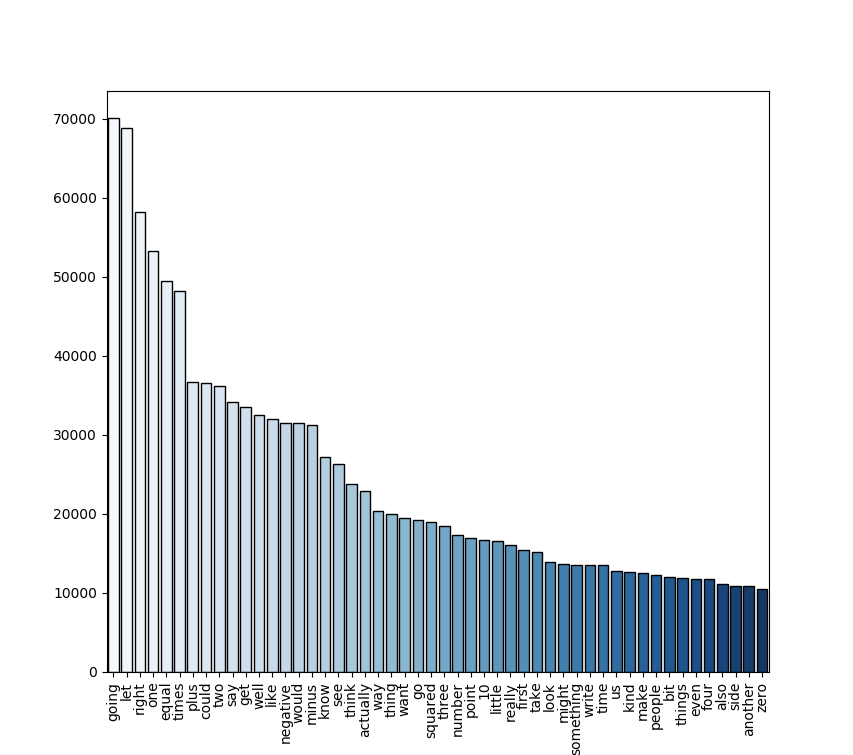

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

In [37]:
g = sns.barplot(x = [x[0] for x in word_count_filtered[:50]], y = [x[1] for x in word_count_filtered[:50]], edgecolor='k', palette='Blues')
plt.xticks(rotation=90)

### Subtitles/Captions

Чтобы сравнить автоматические и стандартные субтитры, использовалась метрика cosine similarity. В качестве корпуса для веторизации использовались стандартные субтитры. Для сравнения были отобраны только видео, для которых загружены оба вида субтитров (subtitles и automatic_captions). 
Для каждого видео была определена cosine similarity его стандартных и автоматических субтитров. Получено среднее значение 0,75. Для некоторых видео значение метрики составило 1. Это говорит о полной идентичности текстов. Можно предположить, что по некоторой причине автоматические субтитры были заменены на стандартные.
Видео с низкими значениями (< 0.2)часто имеют служебную информацию вместо автоматических субтитров или выполнены на языке, отличном от английского. Некоторые видео из этой категории однако имеют достаточно схожие по смыслу тексты, написанные отличными словами. Это предположительно связано с тем, что у видео могла быть заменена звуковая дорожка. 
Если посмотреть на видео, значение метрики для которых близко к 0,75, мы можем увидеть схожие примеры различных слов одинакового значения. Но их меньше, чем в предыдущем случае. В другом случае мы можем видеть удвоение строк для автоматических субтитров (хотя одинаковые строки фильтровались на этапе формирования текстовых файлов).
Вышесказанное позволяет предположить, что использование автоматических субтитров так же удовлетворило бы целям полнотекстового поиска, хотя и есть основания предполагать более высокое качество последних. В курсовом проекте поиск будет осуществляться по автоматическим субтитрам только в случае отсутсвия стандартных.

In [16]:
import numpy as np

In [17]:
df3 = pd.read_csv('/home/lodya/Projects/Term_Project_1/caption_search/captions.csv', delimiter='\t')
df3.plain_text = df3.plain_text.str.replace('&lt;.*?&gt;', '')
df3.plain_text = df3.plain_text.str.replace('\\|/', '')

In [18]:
df3.shape

(7398, 3)

In [19]:
df_common = df2[['id', 'plain_text']].merge(df3[['id', 'plain_text']], on='id', how='inner', suffixes=('_subs', '_caps'))

In [20]:
df_common = df_common.dropna()

In [21]:
swe = stopwords.words('english')
vec = CountVectorizer(stop_words=swe).fit(df2.plain_text)

In [22]:
sims = sklearn.metrics.pairwise.cosine_similarity(vec.transform(df_common['plain_text_caps']), vec.transform(df_common['plain_text_subs']))
sims = np.diag(sims)

In [23]:
sims.mean()

0.7582524578019357

In [24]:
sims

array([1.        , 0.77833171, 0.80317892, ..., 0.65074526, 0.97596631,
       0.79349444])

In [25]:
df_common['cosine_similarity'] = sims

In [26]:
df_common.head()

,id,plain_text_subs,plain_text_caps,cosine_similarity
0,--VYlmbkzNY,- [Instructor] What I wanna do in this video i...,- [Instructor] What I wanna do in this video i...,1.000000
1,-05OfTp6ZEE,"Before we talk about the debt ceiling, it's im...",Before we talk about the debt ceiling We have ...,0.778332
2,-0qEDcZZS9E,We can never have too much practice getting fa...,Want to be familiar with the concept of vector...,0.803179
3,-1zR6pFof5c,(hip hop music) Kelly: I've never seen this. T...,I've never seen this before. It's really impre...,0.513697
4,-2HwisGonfc,Voiceover:Vectors A and B are drawn in the int...,The vector AB is drawn in the Cartesian coordi...,0.648826


In [27]:
df_common[df_common.cosine_similarity == 1]

,id,plain_text_subs,plain_text_caps,cosine_similarity
429,2IfWIGby7K0,oh hello your highness hellooo say what oh hel...,oh hello your highness hellooo say what oh hel...,1.0
628,4C5CdwsUnLw,hello Esther hello sow can you come to a hello...,hello Esther hello sow can you come to a hello...,1.0
879,68mrr430De0,- [Instructor] We're told express the point on...,- [Instructor] We're told express the point on...,1.0
2451,JfqLblHox3o,the triangles below are similar find the the t...,the triangles below are similar find the the t...,1.0
2602,Kze7cw30F60,- [Instructor] In this video we're going to di...,- [Instructor] In this video we're going to di...,1.0
2677,LldS1Z6Zih8,Neal: The scene is indelibly imprinted on anyo...,Neal: The scene is indelibly imprinted on anyo...,1.0
2983,OOiFJ2FxtDA,Jessica ate two slices of cake and Nadia Jessi...,Jessica ate two slices of cake and Nadia Jessi...,1.0
3571,TNaQJjLAhkI,there was a recent blog post on the there was ...,there was a recent blog post on the there was ...,1.0
4132,XxmS_7I6c7Y,- [Instructor] The table below shows solar pan...,- [Instructor] The table below shows solar pan...,1.0
4257,Z65mz__8DQ0,- [Instructor] What I'd like to do in this vid...,- [Instructor] What I'd like to do in this vid...,1.0


In [28]:
df_common[df_common.cosine_similarity <= 0.2]

,id,plain_text_subs,plain_text_caps,cosine_similarity
108,-oFlAhtear4,Choose the right number of each place value to...,Choose the correct number for each To make eig...,0.193033
271,13E90TAtZ30,LeBron: If the history of the earth was a bask...,Not applicable to Khan's school.,0.000000
316,1PsNIzUJPkc,Let's say I have some linear transformation T ...,ertertertertert ihna reabeen in el aslam erter...,0.000000
415,2DVDI-HF4Eg,"Sal: I've been doing this ""Ask Me Anything,"" o...",Introduction Question 1: Do you have any tips ...,0.170565
499,3-xfmbdzkqc,"In the last video, we started with the 2 by 2 ...",vgbh,0.000000
562,3_otNr9kRuY,Find the probability of flipping exactly two h...,Find the probability to fall exactly 2 times i...,0.193771
643,4J-dRA3MGc8,SPEAKER 1: I'm here with Professor Laurence Ba...,I am here now with Professor Lawrence Baker Pr...,0.132929
690,4bmPvB15aYU,"World War I shaped our world in many, many, ma...","1 00: 00: 00,649 - &amp; gt; World War I chan...",0.096750
1000,73eSiVcg4tQ,Part b-- find the slope of the tangent line to...,Part B Find the direction of the tangent line,0.145545
1194,8dMLK2Wueaw,I've talked a lot about using polynomials to a...,I have already talked a lot about how to appro...,0.100108


In [29]:
df_common.iloc[108, 1]

"Choose the right number of each place value to make 8,129. And we could say this is 123 thousandths. Or we could say it is 1 tenth, 2 hundredths, and 3 thousandths. So let's just go place by place. So first we have 8. This 8 right over here is in the thousands place. It represents 8 thousands. So we're going to have 8 thousands. So let's select 1, 2, 3, 4, 5, 6, 7, 8 thousands. Then we have one 100. So we literally just have only one 100 right over there. Then we have 2 tens. This 20 is 2 tens. So we're going to need 2 tens. Then this 9, well, that's just 9 ones. So it's 1, 2, 3, 4, 5, 6, 7, 8, 9. And now we're going into the tenths place. This is only 1 tenth. So 1 tenth right like that. Now this is 2 hundredths. So we're going to put 2 hundredths there. Then finally, 3 thousandths-- 1, 2, 3 thousandths. And we check our answer. And we got it right."

In [30]:
df_common.iloc[108, 2]

"Choose the correct number for each To make eight thousand and one hundred and twenty-nine commas, one hundred and twenty-nine Therefore, for the content part 123, we can utter one two three thousand Or we can say One out of ten, two out of a hundred, three in the thousands At first, let's see it Khanh Khanh At first, we have 8 These eight are in the Ohel Khan It means 8 thousand So we will have 8000 So we choose 1,2,3,4,5,6,7, 8 thousand Then we have 800 So we selectively choose Only one hundred here Then we have two dozen These twenty have two So we'll need only 20 After that, 9, and only 9 are single They are 1,2,3,4,5,6,7,8,9 Then we will go to the category of dozens There are only ten and one, We will write it like this Now, these are two hundred So we'll put two hundred there And then finally, 3 thousand 1,2,3 thousand Then we make sure we answer Our answer is true!"

In [31]:
df_common.iloc[415, 1]

'Sal: I\'ve been doing this "Ask Me Anything," on Reddit, and I\'ve been doing my best to keep up with the questions, but my fingers are getting tired, so I thought I would use, as a backup, what I\'m used to doing, which is make a video on the questions. So, this is the Ask Me Anything. I posted this earlier today, and I put this little picture of myself to verify that it was actually me. Here are the questions, and I\'ll try not to be redundant, so I\'m going to focus on the questions that I haven\'t answered. This first one, "As an aspiring teacher, do you have any tips for new teachers?" And then I did make a little short comment that my best teachers, I felt, were the ones that talked with us, that treated us as equals, rather than were at the board and talked at us, or, in some way, belittled us. I don\'t think most teachers do that, but some do. It didn\'t feel good. I would say on top of that, I think the energy or the interest or the passion that someone takes into a subject i

In [32]:
df_common.iloc[415, 2]

'Introduction Question 1: Do you have any tips for new teachers? Question 2: Which subject did you learn most? Question 3: How long does it take to create one of your learning videos? Question 4: I thought you left your job Sarcasm Question 5: When preparing a video: why do you use the script? Question 6: What did you use to study? Question 7: Where did your site have the greatest impact? Question 8: When you plan more advanced videos, quantum math, general relativity, and more advanced math? Question 9: Question 10: Who or what inspired you to take so much time for something so significant? Question 11: Have you ever thought about what you have accomplished around the Khan Academy in a short time? Do you feel that there will be a link behind you?'

In [33]:
df_common[(df_common.cosine_similarity <=0.76) & (df_common.cosine_similarity >= 0.74)]

,id,plain_text_subs,plain_text_caps,cosine_similarity
27,-EG10aI0rt0,Let's say we have the relationship y is equal ...,Let's assume that dependence is given y is equ...,0.748435
34,-Jx6vyc_830,We're on problem 106. The present ratio of stu...,Do 106 questions now Current student and teach...,0.747058
37,-KrSxA9NCf0,Let's talk a little bit about what I'll call t...,Let me talk about what I call it first. Plutsk...,0.749623
58,-XRQovTI04Q,I made a claim that for this sequence-- and th...,In the previous video I said claim that this l...,0.758260
101,-jqWW22FMdI,"- [Instructor] So we have a circle here, let's...","- [Instructor] Here we have a circle, let's sa...",0.751876
107,-oClpRv7msg,We've talked a little bit about the law of dem...,We talked a bit about the law on the applicati...,0.759592
110,-oW4M3vpuRM,"In the last set of videos, we've hopefully fam...",In the previous video I hope everyone is famil...,0.750350
130,-y9SELk3UNU,We're on problem 190. If the operation star wi...,We have a problem here 190. If the operation i...,0.745639
178,0NyeDUhKwBE,"And, in the last video, we had this differenti...",And in another video we had that differential ...,0.750921
179,0OtQY-gDuJA,"Bill: Well, first went the record stores then ...",First it was music stores then the crowd went ...,0.751644


In [34]:
df_common.iloc[6750, 1]

"- [Instructor] Talk a little bit about what could cause a supply or a demand curve for a currency to shift. So here we have the foreign exchange market for the Chinese yuan which is why we have the quantity of yuan on the horizontal axis and the price of the yuan in terms of another currency on the vertical axis and here that other currency is the US dollar. And associated with, let's just call this S sub one, our supply curve, and D sub one, our demand curve, you have at the intersection an equilibrium point. We have talked about this in other videos. Let's call that e sub one. This would be some dollar price for a yuan. Maybe it's 10 US cents per yuan. And then associated that is also an equilibrium quantity, Q sub one. That would be a certain amount of yuan that is trading hands in a certain time period, whatever the time period this graph or this model applies to. So one big way to think about what would influence supply and demand is think about who holds the supply, and then who

In [35]:
df_common.iloc[6750, 2]

"talk a little bit about what could cause talk a little bit about what could cause talk a little bit about what could cause the supply or demand curve for a the supply or demand curve for a the supply or demand curve for a currency to shift so here we have the currency to shift so here we have the currency to shift so here we have the foreign exchange market for the chinese foreign exchange market for the chinese foreign exchange market for the chinese wan which is why we have the quantity of wan which is why we have the quantity of wan which is why we have the quantity of one on the horizontal axis and the price one on the horizontal axis and the price one on the horizontal axis and the price of one in terms of another currency on of one in terms of another currency on of one in terms of another currency on the vertical axis and here that other the vertical axis and here that other the vertical axis and here that other currency is the US dollar and associated currency is the US dollar

In [36]:
df_common.iloc[793, 1]

'- [Instructor] Brooklyn purchased three pounds of pasta and 12 ounces of cheese to make macaroni and cheese. What is the total weight, in ounces, total weight in ounces, of the pasta and cheese combined? So they give us the weight of the pasta in pounds, and they give us the weight of the cheese in ounces, and we want to add the total weight, but they have to all be in ounces. So let\'s first, let\'s first convert these three pounds of pasta into a certain amount of ounces of ounce, of pasta. So we already know that one pound is equal to 16 ounces. They tell us that. So what would three pounds be? So, if I had three pounds, how many ounces would that be? I encourage you to pause the video and think about it. Well, let\'s see, if you\'re having three times the pounds, you\'re also going to have three times the ounces. So, if one pound is 16 ounces, if you have three times as many pounds, you\'re gonna have three times as many ounces. So 16 times three is 48, 48 ounces. So Brooklyn, the

In [37]:
df_common.iloc[793, 2]

'Brooklyn bought 3 pounds of macaroni and 12 ounces of cheese to make macaroni with cheese. What is the total weight in ounces of pasta and cheese combined? We are given the weight of the macaroni in pounds, and we are given the weight of the cheese in ounces, and we want to find the total weight, but both must be in ounces. So let me first turn these 3 pounds of macaroni in a certain amount of ounces of macaroni. We already know that 1 pound is equal to 16 ounces. This is what we are told. So how much will it be 3 pounds? If I have 3 pounds, how many ounces will this be? I recommend that you stop the video and think about it. Okay, let\'s see if you\'ve got 3 times the ponds, you will also have 3 times ounces. So if 1 pound is 16 oz, if you have 3 on as many pounds, you\'ll have 3 under so many ounces. 16 at 3 is 48, 48 ounces. So the three pounds of macaroni she bought Brooklyn, may also be regarded as 48 ounces. 48 ounces of macaroni. It has 48 ounces of macaroni and 12 ounces of ch